In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Q_matrix = np.array([[50142.56239554, 50478.20531291],
       [50224.41728942, 50469.54698253],
       [51979.4484728 , 52185.60337894],
       [54380.91595989, 54597.62247261],
       [55988.71238238, 55851.73566667]])

In [3]:
L = 50
L_half = L/2
a = 1.66

In [4]:
v0 = 5
rho_bar = 0.2
A = (50**2 - (np.pi*(1.66**2)))
N_new = int(rho_bar*(A))
D = np.array([1,2,7])
tau_r = 1.10688**2/(3*D)
dt = 0.001
T = 100
steps = int(T/dt)
tot_states = 5
tot_actions = 2

In [5]:
r_values = np.linspace(0,L/2,51)
centres = 0.5*(r_values[:-1] + r_values[1:])
dr = r_values[1] - r_values[0]
areas = 2*np.pi*centres*dr

In [6]:
bin_size = L/(2*tot_states)
bin_ranges = np.linspace(0, L/2, tot_states+1)

In [7]:
def dist_to_state(r):
    return np.minimum((r//bin_size).astype(int), tot_states-1)

0.2 [0.         0.         0.         0.01227767 0.03713615 0.04738477
 0.05711214 0.06201738 0.06679827 0.07036324 0.07389337 0.08227619
 0.08447944 0.09475614 0.09228243 0.10003658 0.1009187  0.10786158
 0.11046213 0.10742959 0.10886586 0.10935425 0.10790705 0.11513336
 0.11449412 0.11451354 0.11681372 0.11839681 0.1206925  0.11830068
 0.11658752 0.11656205 0.11364887 0.11346322 0.11543347 0.11493901
 0.12026009 0.12445917 0.13952928 0.20879517 0.30842656 0.30650749
 0.3037238  0.30461707 0.30578314 0.30535013 0.2976882  0.29178127
 0.29203291 0.28805437]
0.2 [0.         0.         0.         0.01216398 0.03421831 0.05317222
 0.06653901 0.07793287 0.08706712 0.10043515 0.10697486 0.11289621
 0.11389128 0.12467137 0.12556776 0.13376716 0.13419655 0.14135233
 0.1439707  0.14362713 0.14246308 0.14153686 0.14380533 0.15383849
 0.15140832 0.15737615 0.15693278 0.16002306 0.16036955 0.16129949
 0.16027685 0.16179489 0.15861626 0.15680325 0.16119628 0.16274153
 0.16166218 0.16548931 0.17088

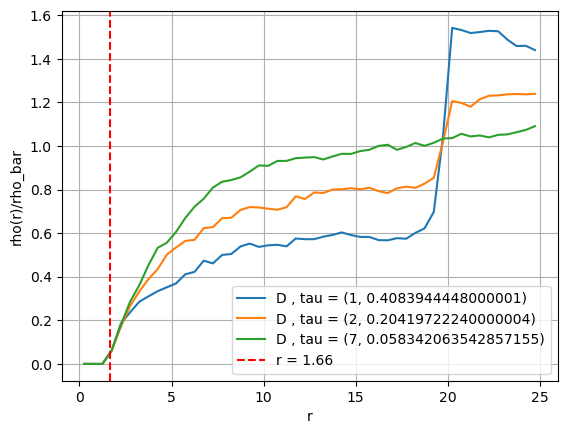

In [8]:
for D0,tau in zip(D,tau_r):   
    '''
    
    Now for each (D0,tau) value I need to to find rho/rho_bar profile as a funtion of r(radial distance)
    
    For (D,tau):
      
      initialise position for N_new particles and also their direction vector is fixed
      Also have their accumulation array initialised which is used for plotting final profile
      
        for each step(T/dt)
            
            move all N particles based on their state and wholly due to previously learned Q matrix
            
            after some threshold timke add the profile density to the accumulation array
            
        plot the final accumulation vs radial distance aftere normalization
            
            
    
    '''
    
    pos = (np.random.rand(N_new,2) - 0.5)*L
    phi = np.random.rand(N_new) * 2*np.pi
    accum = np.zeros(len(r_values) - 1)
    
    
    for step in range(steps):
        
        
        r = np.linalg.norm(pos,axis = 1)
        s = dist_to_state(r)
        
        if step > 0.2*steps and step%50 == 0:
            hist , _ = np.histogram(r,bins = r_values)
            accum += hist
        
        best = np.argmax(Q_matrix[s] , axis = 1)
        phi += np.sqrt(2*dt/tau)*np.random.randn(N_new)
            
        direction_vectors = np.vstack((np.cos(phi) , np.sin(phi))).T
            
        v = direction_vectors * best[:,None] * v0
            
            
        pos += v*dt + np.sqrt(2*D0*dt)*np.random.randn(N_new,2)
        pos = ((pos + L/2) % L) - L/2
        
        r = np.linalg.norm(pos, axis=1)

        close_indices = np.where(r < a)[0]

        n_reset = len(close_indices)
        
        while n_reset > 0:
            
            new_pos = (np.random.rand(n_reset, 2) - 0.5) * L

            new_phi = np.random.rand(n_reset) * 2 * np.pi

            pos[close_indices] = new_pos
            phi[close_indices] = new_phi
            
            r = np.linalg.norm(pos, axis=1)
            
            close_indices = np.where(r < a)[0]

            n_reset = len(close_indices)
            
    sample_size = (0.8*steps/50)
    rho_r = accum/(areas * sample_size)
    print(rho_bar , rho_r)
    rho_r_norm = rho_r / rho_bar 
    plt.plot(centres , rho_r_norm , label = f'D , tau = {D0 , tau}')
            


plt.axvline(a , color = 'r' , ls = '--' , label = 'r = 1.66')
plt.xlabel('r')
plt.ylabel('rho(r)/rho_bar')
plt.grid(True)

plt.legend()